In [53]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')

In [54]:
df = pd.read_csv(r'podaci\baseballnn.csv')
df

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,23.0,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383.0,0.305,0.377,0.555,0.980,Outfield,1
1,13.0,1165.0,4019.0,378.0,1022.0,163.0,19.0,57.0,366.0,208.0,499.0,0.254,0.294,0.347,0.985,Second_base,0
2,13.0,1424.0,5557.0,844.0,1588.0,249.0,48.0,9.0,394.0,453.0,223.0,0.286,0.343,0.353,0.974,Second_base,0
3,14.0,1281.0,4019.0,591.0,1082.0,188.0,49.0,37.0,303.0,414.0,447.0,0.269,0.340,0.368,0.955,Third_base,0
4,17.0,1959.0,6606.0,823.0,1832.0,295.0,35.0,336.0,1122.0,594.0,1059.0,0.277,0.339,0.485,0.994,First_base,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,11.0,1234.0,4131.0,572.0,1093.0,159.0,22.0,237.0,776.0,383.0,755.0,0.265,0.331,0.486,0.968,Outfield,0
1336,19.0,1280.0,4546.0,617.0,1224.0,222.0,76.0,26.0,620.0,390.0,323.0,0.269,0.339,0.369,0.952,Catcher,0
1337,12.0,1095.0,3283.0,353.0,773.0,130.0,22.0,91.0,352.0,246.0,678.0,0.235,0.291,0.372,0.941,Third_base,0
1338,13.0,1456.0,5304.0,695.0,1566.0,275.0,105.0,58.0,796.0,242.0,404.0,0.295,0.331,0.419,0.928,Third_base,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number_seasons   1340 non-null   float64
 1   Games_played     1340 non-null   float64
 2   At_bats          1340 non-null   float64
 3   Runs             1340 non-null   float64
 4   Hits             1340 non-null   float64
 5   Doubles          1340 non-null   float64
 6   Triples          1340 non-null   float64
 7   Home_runs        1340 non-null   float64
 8   RBIs             1340 non-null   float64
 9   Walks            1340 non-null   float64
 10  Strikeouts       1340 non-null   float64
 11  Batting_average  1340 non-null   float64
 12  On_base_pct      1340 non-null   float64
 13  Slugging_pct     1340 non-null   float64
 14  Fielding_ave     1340 non-null   float64
 15  Position         1340 non-null   object 
 16  Hall_of_Fame     1340 non-null   int64  
dtypes: float64(15)

In [56]:
Y = df['Hall_of_Fame']
X = df.drop({'Hall_of_Fame', 'Position'}, axis=1)
feature_names = X.columns
X.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave
0,23.0,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383.0,0.305,0.377,0.555,0.980
1,13.0,1165.0,4019.0,378.0,1022.0,163.0,19.0,57.0,366.0,208.0,499.0,0.254,0.294,0.347,0.985
2,13.0,1424.0,5557.0,844.0,1588.0,249.0,48.0,9.0,394.0,453.0,223.0,0.286,0.343,0.353,0.974
3,14.0,1281.0,4019.0,591.0,1082.0,188.0,49.0,37.0,303.0,414.0,447.0,0.269,0.340,0.368,0.955
4,17.0,1959.0,6606.0,823.0,1832.0,295.0,35.0,336.0,1122.0,594.0,1059.0,0.277,0.339,0.485,0.994


In [57]:
Y.unique()

array([1, 0, 2], dtype=int64)

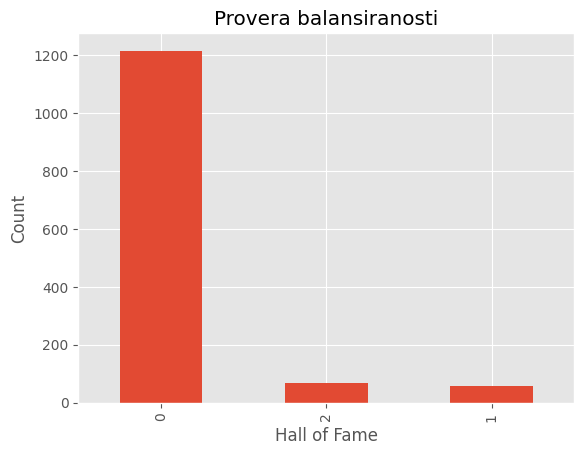

In [58]:
ax = Y.value_counts().plot(kind='bar', title='Provera balansiranosti')

ax.set_xlabel('Hall of Fame')
ax.set_ylabel('Count')

plt.show()

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

In [60]:
# !pip install termcolor
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['0', '1', '2'], index=['0', '1', '2']))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['0', '1', '2'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


In [61]:
dtc = DecisionTreeClassifier()

In [62]:
dtc.fit(X_train, Y_train) # treninranje modela

DecisionTreeClassifier()

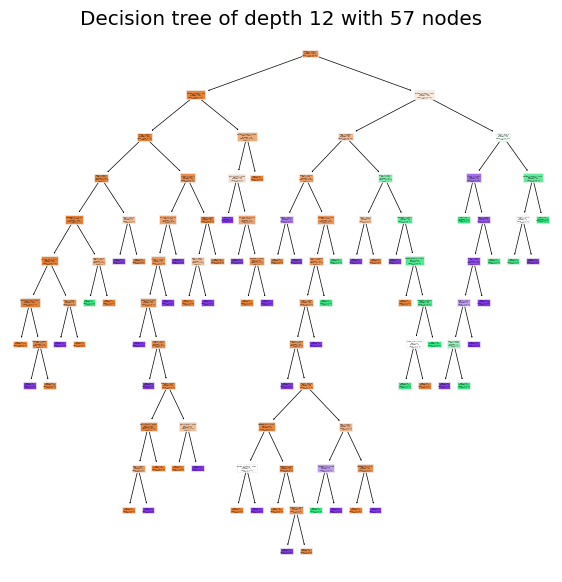

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [63]:
plot_decision_tree(dtc, feature_names)

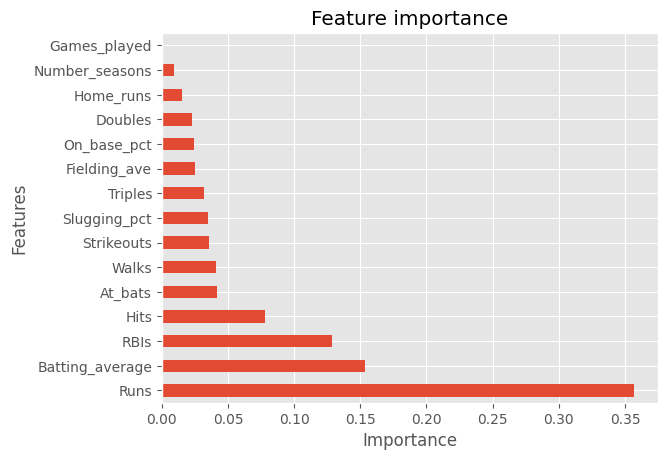

In [64]:
ax = pd.Series(dtc.feature_importances_, index=X.columns).sort_values(ascending=False).plot.barh()
    
ax.set_xlabel('Importance')
ax.set_ylabel('Features')

plt.title("Feature importance")
plt.show()

In [65]:
report(dtc, X_train, Y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        51

    accuracy                           1.00      1005
   macro avg       1.00      1.00      1.00      1005
weighted avg       1.00      1.00      1.00      1005

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
     0   1   2
0  911   0   0
1    0  43   0
2    0   0  51
---------------------------------------------------------------------------------


In [66]:
report(dtc, X_test, Y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       304
           1       0.56      0.36      0.43        14
           2       0.36      0.47      0.41        17

    accuracy                           0.91       335
   macro avg       0.63      0.60      0.60       335
weighted avg       0.91      0.91      0.91       335

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
     0  1   2
0  292  2  10
1    5  5   4
2    7  2   8
---------------------------------------------------------------------------------


In [67]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }

In [68]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3) # Po defaultu je cv=5
#estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3, scoring = 'precision') 

In [69]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [70]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [71]:
estimator.best_score_

0.9393034825870646

In [72]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       911
           1       0.83      0.79      0.81        43
           2       0.94      0.33      0.49        51

    accuracy                           0.96      1005
   macro avg       0.91      0.71      0.76      1005
weighted avg       0.96      0.96      0.95      1005

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
     0   1   2
0  911   0   0
1    8  34   1
2   27   7  17
---------------------------------------------------------------------------------


In [73]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       304
           1       0.46      0.43      0.44        14
           2       0.25      0.06      0.10        17

    accuracy                           0.92       335
   macro avg       0.55      0.49      0.50       335
weighted avg       0.89      0.92      0.90       335

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
     0  1  2
0  302  1  1
1    6  6  2
2   10  6  1
---------------------------------------------------------------------------------


In [74]:
estimator.cv_results_

{'mean_fit_time': array([0.00316834, 0.00349267, 0.00451692, 0.00519808, 0.00318384,
        0.00440216, 0.0050532 , 0.00487431]),
 'std_fit_time': array([0.00061352, 0.00070902, 0.00040686, 0.00084931, 0.00024168,
        0.00029151, 0.00043611, 0.00018119]),
 'mean_score_time': array([0.00149695, 0.00116658, 0.00113901, 0.00117723, 0.00133554,
        0.00101693, 0.00084146, 0.00117628]),
 'std_score_time': array([4.06273902e-04, 2.39562707e-04, 1.99476276e-04, 2.54454648e-04,
        4.66082989e-04, 1.49455469e-05, 2.17538834e-04, 2.52768774e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
            

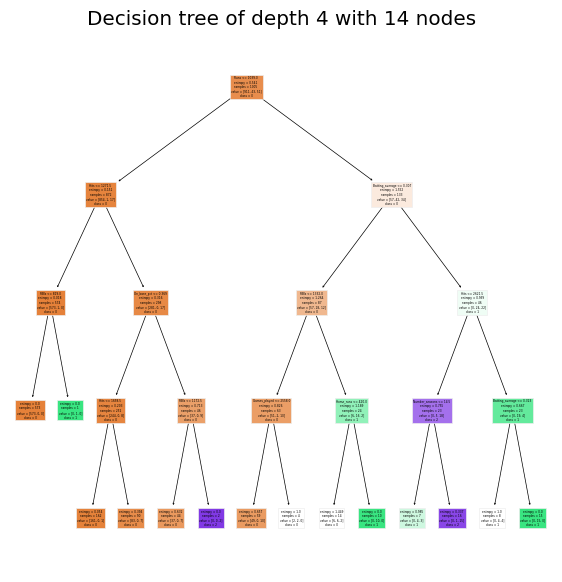

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 4
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [75]:
plot_decision_tree(estimator.best_estimator_, feature_names)

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       304
           1       0.55      0.43      0.48        14
           2       0.33      0.06      0.10        17

    accuracy                           0.92       335
   macro avg       0.61      0.49      0.52       335
weighted avg       0.89      0.92      0.90       335

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
     0  1  2
0  302  1  1
1    7  6  1
2   12  4  1
---------------------------------------------------------------------------------


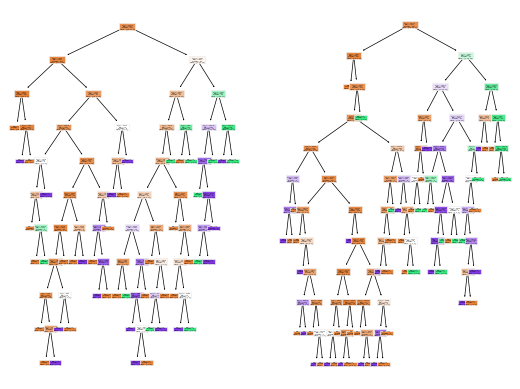

In [76]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=2)
random_forest.fit(X_train, Y_train)

report(random_forest, X_test, Y_test, "test")

for i in range(1, len(random_forest.estimators_) + 1):
    plt.subplot(1, 2, i)
    #report(random_forest.estimators_[i-1], X_test, Y_test)
    plot_tree(random_forest.estimators_[i-1], filled=True)

In [77]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

report(random_forest, X_train, Y_train)

report(random_forest, X_test, Y_test, "test")

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        51

    accuracy                           1.00      1005
   macro avg       1.00      1.00      1.00      1005
weighted avg       1.00      1.00      1.00      1005

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
     0   1   2
0  911   0   0
1    0  43   0
2    0   0  51
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on test data
-----------------------